# Road networks structure analysis: A preliminary network science-based approach

### 📄 Article
---

Reza, S., Ferreira, M. C., Machado, J., & Tavares, J. M. R. (2022). Road networks structure analysis: A preliminary network science-based approach. Annals of Mathematics and Artificial Intelligence, 92(1), 215–234. [10.1007/s10472-022-09818-x ](https://doi.org/10.1007/s10472-022-09818-x)



### Part 0: Setup
---

This notebook requires the following libraries to be installed and imported:
- **[osmnx](https://osmnx.readthedocs.io/en/stable/user-reference.html#)**: for downloading and processing road networks
- **[keplergl](https://docs.kepler.gl/docs/keplergl-jupyter)**: for visualizing road networks
- **[plotly](https://plotly.com/python/)**: for creating interactive visualizations
- **[NetworkX](https://networkx.org/documentation/stable/)**: for creating and analyzing graph/network structures (e.g. road networks or social networks)

In [ ]:
# Always good to start with import
# spatial
import geopandas as gpd
import pandas as pd

# network
import osmnx as ox
import networkx as nx

# Viz
from keplergl import KeplerGl
import plotly.express as px


If you need to install any of these libraries, you can use pip. For example:
```sh
!uv pip install networkx plotly
```


### Part 1: Reproduce the publication: Graz Case Study
---

The goal is to partially reproduce the kind of analysis done in the original paper, but for a single city: __Graz__.

💡 Feel free to experiment beyond the instructions: this is an open exercise, and understanding comes from exploring the data and seeing the outcome of different analyses.

#### Step 1️⃣: Retrieve the Graz road network using OSMnx
---

**Tasks**: 
- Use osmnx to retrieve the graph for Graz, Austria
- Reproject your graph to a Styrian CRS
- Calculate the graph summary statistics
- Plot the Graz road network graph

💡 The osmnx function `graph_from_place` can be used to retrieve the graph for a given place. The function takes a string as input, which can be a place name, a place ID, or a place geometry. The function returns a graph object, which can be used to analyze the network.

💡 The `network_type` parameter can be used to specify the type of network to retrieve. The default is `drive`, which retrieves the driving network. Other options include `walk`, `bike`, and `all`.

In this exercise, we will use the `drive` network, which is the default. 

In [ ]:
# TODO: Import OSMnx and retrieve the road network graph for Graz, Austria.


⁉️ What data do you have as an output? What does it look like? 

💡 The osmnx function `project_graph` can be used to project a graph to a different coordinate reference system (CRS). The function takes a graph object and a CRS as input, and returns a new graph object with the nodes and edges projected to the specified CRS.

⁉️ What CRS should we use? -> `EPSG:32633`

💡 The osmnx function `stats.basic_stats` can be used to compute basic statistics of a graph.

⁉️ What statistics do you observe?

⁉️ What OSMnx built-in function can we use to plot the graph?


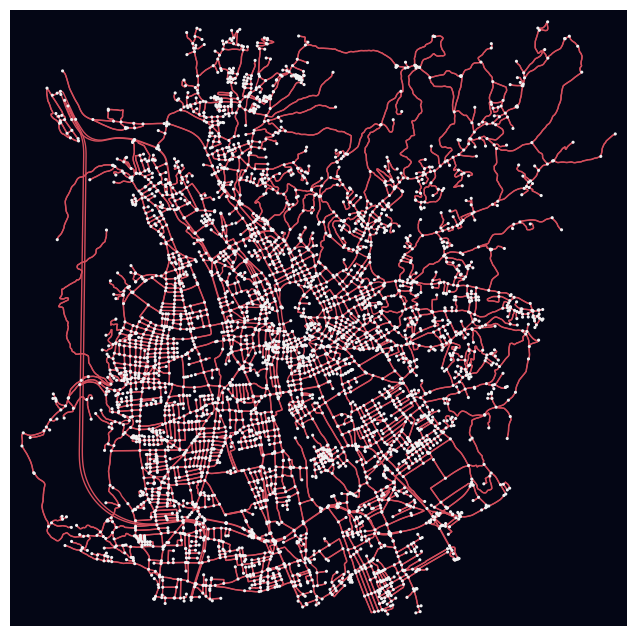

In [ ]:
# TODO: Reproject the network to the metric crs and plot it

# TODO: print the statistics of the network

# TODO: Plot the network using osmnx built-in function


If you prefer an interactive visualization, you could use KeplerGl. You should convert the graph to geodataframes `ox.graph_to_gdfs(__)`, then use KeplerGl to display these.

In [ ]:
___, ____ = ox.graph_to_gdfs(___)

map = KeplerGl(height=600)
map.add_data(data=___, name='___')
map


💭 'After plotting, take a look at the structure of Graz’s road network. 

> Do you see a dense downtown area with a grid or radial pattern? Are there major roads extending outward? Any ring roads or highways visible? Noting these features can help make sense of the results later. For example, if you see a ring road around the city, you might expect high betweenness on the few nodes where radial roads meet that ring. If the city has a river or park splitting areas (with only a few bridges or crossings), those crossing points might become important in centrality measures. 

Keep these visual clues in mind as they often explain why certain nodes end up with high or low values in the analysis.

#### Step 2️⃣: Average connection per nodes
---

**Tasks**: 
- Get the number of node connections in Graz
- Plot the results
- Calculate the average node connection

⁉️ In the statistics of the graph, did you find a value that seems to be the number of connections per node?

💡 Try to get the values from the statistics

Then you can transform the result into a dataframe using `from_dict` from pandas

In [ ]:
# TODO: get the connections of the nodes
connections = ___
___ = ____(connections, orient='index', columns=['value'])

# TODO: print the dataframe

We will use Plotly to plot the results. We want to create, like in the publication, a histogram of the number of nodes in the network.
Plotly is a Python library that allows you to create interactive plots. It is a bit more complex than matplotlib, but it is also more powerful.

To plot an histogram you can simply use: 
```python 
fig = px.bar(dataframe)
fig.show()
```


In [ ]:
# TODO: plot the graph



In [ ]:
# TODO: Calculate the average node connection
# (COLUMN_VALUE * INDEX).sum() / COLUMN_VALUE.sum()


np.float64(2.624053826745164)

#### Step 3️⃣: Degree Centrality Analysis
---

**Tasks**: 
- Compute the degree centrality for all nodes in Graz
- Plot the results

💡 NetworkX provides `degree_centrality`, which returns a dictionary of nodes with their degree centrality values. (Degree centrality in an undirected network is basically degree / (N-1), so it will be a value between 0 and 1.<br>
Since OSMnx's graph may be directed (due to one-way streets), you might want to treat it as undirected for this analysis. You can convert a directed graph to an undirected graph using `DIRECTED_GRAPH.to_undirected()`, which ensures that each road counts regardless of direction.

Store the result in a variable, which will be a dictionary `{node: value}`. You can transform this dictionary into a pandas DataFrame (like we did before in step 2). 

Now you are ready to join this DataFrame with the nodes DataFrame, extracted from the Graph (at the Kepler step) 


In [ ]:
# TODO: extract the degree of each node from your undirected graph

# TODO: transform you dictionary into a pandas DataFrame

# TODO: join your DataFrame with the nodes DataFrame, using the node ID as the common key
____ = ____.join(___) # you can join both dataframes because they are indexed by the node ID
___.rename(columns={'OLD_COLUMN_NAME': 'NEW_COLUMN_NAME'}, inplace=True) # you can rename a column of a dataframe using the rename method


# TODO: plot the degree centrality with Kepler


💭 Degree centrality reveals the most connected intersections in Graz. Consider the results:
> Which intersection(s) have the highest degree centrality? These would be the nodes with the most connecting roads. Do you know these locations in real life? Often they might be large public squares, roundabouts, or major highway junctions.
>
> What is the highest degree you found? If an intersection has a degree (number of roads) of, say, 5 or 6, that's quite high for a planar road network (since most urban intersections are 3 or 4-way). A very high-degree node might indicate a complex junction or perhaps where multiple small streets cluster.
>
> Is the degree distribution mostly homogeneous or very skewed? In many cities, most intersections have degree 3 (which could indicate a T-intersection or end of a cul-de-sac connecting back, etc.). A few might have degree 4 (crossroads) or higher. If you see that nearly all nodes have degree 2 or 3 and just a handful have 4+, that’s a sign of a fairly uniform grid or tree-like residential network with a few big junctions.
> 
> **What do these hubs mean for the city?** High-degree nodes often handle a lot of local connectivity. For example, a roundabout where several avenues meet can disperse traffic in many directions. However, high degree alone doesn’t always mean high importance: that’s where betweenness (coming up) will add more insight. Still, identifying high-degree intersections is a first step: these are places with many roads, likely significant for local navigation and possibly landmarks in the urban layout.

#### Step 4️⃣: Other Centrality Analysis
---

**Tasks**: 
- Compute the **betweenness** centrality: how often each node is on the shortest path between other nodes
- Compute the **closeness** centrality: how centrally located each node is, based on distances in the network
- Compute the **eigenvector** centrality: how important each node is based on its connections to other important nodes
- Plot each of the results

💡 This other centrality value works as in the example above. Try to find the correct functions to use.

In [ ]:
# TODO: Calculate the betweenness centrality of the graph and plot the results with KeplerGL
# because we are calculating the shortest paths, we have to add a weight to the edges, you should define the `weight` of the edges. 
# What weight should you use?


💭 Betweenness centrality will highlight bottlenecks or bridge nodes in Graz's road network.

> Look at the intersections with the highest betweenness. Are they what you expect? For instance, are they bridges over the Mur river? Or perhaps major intersections where highways or main roads converge?
>
> Often, high betweenness nodes are not necessarily the ones with the most direct connections (degree) but rather ones strategically placed on many routes. For example, a small bridge might only connect two roads (degree 2), but if it's the only bridge over a river for a long stretch, every east-west trip might cross it.
> - Do the high betweenness nodes correspond to known traffic hotspots? Think of places in Graz where a lot of traffic must pass. Possibly entries/exits of the city, key junctions on ring roads, roads around parks, etc.
> 
> **What does this imply for the city?** Intersections with high betweenness are critical for connectivity. If one of those were blocked (think road closure), it could significantly disrupt travel, as many shortest paths would need to detour. City planners often want to ensure there are alternatives. From a resiliency standpoint, identifying these points shows where the network is most vulnerable or most crucial.
>
> Check if any high-degree nodes also have high betweenness. Sometimes yes (like a big roundabout that also bridges major areas), but sometimes a high-degree node might not be the highest betweenness if there are multiple ways around it. Conversely, a node of moderate degree might have high betweenness if it sits on a key corridor.

This analysis gives us a sense of the traffic flow skeleton of the city: which points carry the most "load" in terms of shortest path routes.


In [ ]:
# TODO: Calculate the closeness centrality of the graph and plot it
# you can use `.describe()` to get a summary of the values


💭 Closeness centrality highlights how centrally located (in terms of distance) each intersection is within the entire network.

> Which node has the highest closeness centrality? Is it near the geographic center of Graz? Often, the node with highest closeness will be somewhere in the middle of the network, because it has the shortest average distance to all other nodes.
> 
> What does a high closeness value indicate about that area of the city? It suggests that from that intersection, one can reach all other parts of Graz with relatively few steps (road segments). This could mean the road density around it is high (lots of direct connections) or that it sits at a spot where it has good access in all directions.
> 
>
> **What does this mean for urban accessibility?** If the network has generally high closeness values across many nodes, it means the city is well-connected (short paths everywhere). If there’s a big drop-off as you go outward, it might suggest a more tree-like branching in suburbs.
>
> For Graz, consider if there are any natural or planned reasons for certain areas to have high closeness. Perhaps Graz’s historic center or a junction near where multiple major roads intersect could be the one with highest closeness. 

This measure essentially gives an idea of network efficiency from each node’s perspective: a high value is like being in the "center of the action," network-wise.

In [ ]:
# TODO: Calculate the eigenvector centrality of the graph and plot it
# this can be long to compute, therefore you can limit the number of iterations by using the `max_iter` parameter


💭 Eigenvector centrality will tell us about the core influence of intersections in Graz.

> Which nodes have the highest eigenvector centrality? Are these nodes also high-degree nodes, or do they have something else in common? Often, in a well-connected city center, a bunch of intersections all connected to each other (via multiple routes) will all score high together.
> 
> It might be that a certain area of the city (like the downtown grid) emerges with high eigenvector centrality for many of its intersections. This is because they form a cluster that is internally well-connected (each one connected to many others in that cluster), boosting each other's score.
> 
> **What insight does this give?** In road networks, eigenvector centrality can highlight the downtown vs outskirts effect. A tightly interconnected central zone will have high eigenvector centrality nodes. These might correspond to the main urban core (e.g., around main squares, central business district). It tells us where the "heart" of the network is in terms of connectivity. 
>
> If Graz has multiple centers (polycentric structure), you might see a couple of different clusters, each with high eigenvector nodes. But often one largest cluster dominates.

This measure, alongside degree and betweenness, further enriches our understanding: degree gave local connectivity, betweenness gave critical bridges, and eigenvector is giving us the global connectivity influence. A robust road network will have a strong core (some high eigenvector nodes) but also not too much reliance on single bridges (betweenness). <br>
⁉️ How Graz balances these.

#### Step 5️⃣: Average Nearest Neighbor Degree Analysis
---

**Tasks**: 
- Compute the average neighbor degree for each node
- Calculate the mean of the average nearest neighbor degree for each node
- Plot the results

⁉️ How to calculate the average neighbor degree? What function can we use?

In [ ]:
# TODO: Calculate the average neighbour degree

# TODO: print the mean of the average neighbour degree

# TODO: plot the average neighbour degree with KeplerGL


np.float64(2.744743481917578)

💭 This metric gives insight into the mixing patterns of the network:

> If you look at nodes with high degree in Graz, do their neighbors also have relatively high degree, or are they mostly low-degree? For example, if you find a node with degree 8 and its neighbors on average have degree 2 or 3, that suggests a hub feeding into small streets (a sign of a hierarchical, disassortative network). <br>
> On the other hand, if a node with degree 5 has neighbors with degree, say, 4 on average, that indicates that big nodes are clustering together somewhat (assortative mixing by degree).
> 
> You might notice a trend: many social networks are assortative (high connects to high), but road networks are often disassortative (high-degree intersections connect to low-degree intersections). This is because typically a big arterial road intersection will branch into many smaller residential roads, rather than connecting directly to another arterial of equal size without intermediate smaller intersections.<br>
> ⁉️ Does the data for Graz support this? 
>
> **Why does this matter?** Degree correlations affect network resilience and flow. In a disassortative network, hubs connected to spokes mean that those hubs carry a lot of burden (like a highway interchange dispersing into local streets). If a hub fails, those spokes are cut off more severely (since they weren't connected to each other much). In an assortative cluster, hubs interconnecting can provide multiple pathways (redundancy).

#### Step 6️⃣: Community Detection (Louvain) Analysis
---

**Tasks**: 
- Perform Louvain community detection on the Graz road network
- Plot the results

💡 NetworkX has the algorithm `community.louvain_communities`, which will return a list of communities (each community is a set of nodes).<br>
Make sure to convert your graph to an undirected graph for this analysis, because community detection algorithms typically expect an undirected, unweighted graph.

In [ ]:
# TODO: calculate the communities using the louvain algorithm

___ = ___(___,weight='___',resolution=0.5) # the resolution parameter controls the granularity of the communities, fine-tune it to get a good number of communities (approximate to the number of district in Graz)


# TODO: How many communities do you get?


18

Now we have to assign a community to each node of our graph from their ID. 

One approach is to transform our array of communities into a dictionary with the community ID as key and the list of nodes as value.

We have:<br>
`{[node_id, ...],[node_id, ...],...}`<br>
➡️`.community_1...community_2...community_X...`<br>

and we want to transform it into <br>
`{node_id:community_id, node_id:community_id, ...}`<br>


In [ ]:
# TODO: transform the louvain output as a dictionary like the other outputs

dict_communities = {} # create an empty dictionary
for community_id, nodes in enumerate(LOUVAIN_OUTPUT): # enumerate returns the index and the value
    for node in nodes: # for each node in the community
        dict_communities[node] = community_id # add the node to the dictionary with the community id as value
dict_communities 

In [ ]:
# Now you know what to do
# TODO: add communities to the nodes DataFrame

# TODO: Plot the network with communities


Let's compare the results with the Graz district boundaries and plot it together with the community detection results.
In OSM you can get the boundaries with this tags: <br> `{'admin_level': '9', 'boundary_type': 'administrative'}`

💡 don't forget to change the crs of the Graz district boundaries to match the crs of the community detection results.

In [ ]:
# TODO: download graz district boundaries

# TODO: plot all data in Kepler


⁉️ Are they similar?

💭 Community detection on a road network can reveal clusters of intersections that are more densely connected internally.

> How many communities were detected? If you get, say, just a few communities, it might mean the algorithm found some broad divisions in the network. If you get a lot, it could mean the network doesn’t have strong modular structure or that it’s picking up small neighborhoods.
>
> Look at the size of the communities. Is there one giant community containing most nodes and a few small ones? That could happen if the city is mostly well-connected and only a couple of peripheral areas are somewhat separated. Or, you might get a handful of medium-sized communities.
> 
> Try to interpret what these communities might correspond to. Often, communities might be geographically contiguous areas:
> - For example, one community might correspond to the city center where there's a dense cluster of interconnected streets.
> - Another community might be a suburb or district that, aside from a few arterial connections, has most of its roads internally connected.
> - Sometimes, natural boundaries create communities: areas separated by a river or a highway might fall into different communities because only a few edges connect across the barrier.
> 
> In general, road networks might not have extremely pronounced communities like social networks do, but moderate modularity can arise from distinct neighborhoods or city planning zones. For instance, a large residential area with a few entrance/exit roads might form a community.
> 
> **What does this tell us?** It helps identify sub-networks within the city. Urban planners might use this to recognize areas that are relatively self-contained. If one community is much less connected to others (low inter-community edges), it might experience isolation in terms of traffic (only a few ways in or out, which can be congestion pinch points).
> 
> 💡 Also consider modularity: Louvain works by maximizing modularity. If the modularity score is high, the network has a strong community structure. If low, the city is basically one big cluster. You might not calculate it here explicitly, but the number of communities and their sizes give a hint. A few balanced communities usually indicates some structure.<br>
> You can use for the modularity `nx.community.modularity(undirected_G, louvain_output)`

#### Step 7️⃣: PageRank Analysis
---

**Tasks**: 
- Compute the PageRank score for each node in the network
- Plot the results

💡 NetworkX's PageRank will treat the graph as directed by default if G is directed. You can use the default alpha value of 0.85 or increase it to 0.9.

PageRank scores are typically normalized to sum to 1.0 (so values will be relatively small, e.g., 0.001, 0.002, etc., depending on network size, but the ranking is what matters).


In [ ]:
# TODO: compute the pagerank of the graph

# TODO: plot the results


💭 PageRank provides another lens on node importance, influenced by the structure of the whole network (like eigenvector centrality, but with the random walk paradigm).

> Which intersections have the highest PageRank in Graz? Often, you'll find it correlates quite a bit with degree centrality in undirected networks; intersections with many roads usually naturally have a lot of chance to receive the random walker. However, PageRank also considers indirect influence, so a node connected to many nodes that themselves have few connections might not get as much boost as a node connected to fewer but well-connected neighbors.
> 
> If you used the directed graph for PageRank: nodes with many incoming roads (like where one-way streets funnel in) might rank higher. Graz might have one-way systems in the center, possibly affecting that.
> 
> Compare the top PageRank nodes with the top eigenvector centrality nodes. They likely overlap, since both are capturing a notion of being connected to important nodes. Any differences could be interesting: for example, if an intersection had a lot of importance via one-way traffic (like a main entry point), PageRank might catch it while eigenvector (on an undirected basis) might not highlight it as much.
> 
> Also compare to betweenness: sometimes a node with high betweenness (bridge) might also get a decent PageRank because many paths go through it, meaning a random walk has a good chance to pass through it too. But PageRank doesn’t explicitly favor shortest paths – it favors well-connected basins in the network where random walks might get "trapped" for a while.
> 
> **What urban insight can we get?** If PageRank highlights a particular intersection that maybe didn't stand out in degree, it could be something like a critical intersection with balanced flows coming in. But usually, in an undirected road network, PageRank won't radically differ from degree/eigenvector results.
> 

Essentially, PageRank confirms the important nodes we've seen through other measures, adding confidence that those intersections are indeed central to the network’s connectivity. 

Congratulations! 🎉 You have successfully completed the exercise.

In [1]:
# this line is to clear the output of the notebook, so that when you commit it, it is clean
!jupyter nbconvert --clear-output --inplace network_ex.ipynb

zsh:1: /Users/tibo/UniGraz/Areas/venv-gst.200b/bin/jupyter: bad interpreter: /Users/tibo/UniGraz/Areas/GST.200UB/venv-gst200b/bin/python: no such file or directory
